## Slide:
###Correlation Examples
#### Load and Clean Data
Create the Win Percentage Column and multiply Save % by 100.

In [72]:
import pandas as pd

github_url = 'https://raw.githubusercontent.com/BivinSadler/Pontem-Analytics/main/NHLData.csv'
Save = pd.read_csv(github_url, encoding='latin1', engine='python')
Save['WP'] = Save['W'] / Save['GP'] * 100
Save['Team Sv%'] = Save['Team Sv%'] * 100
Save['SA'] = Save['SA'].str.replace(',', '', regex=False)
Save['SA'] = pd.to_numeric(Save['SA'])
Save['Hits'] = Save['Hits'].str.replace(',', '', regex=False)
Save['Hits'] = pd.to_numeric(Save['Hits'])
Save['BkS'] = Save['BkS'].str.replace(',', '', regex=False)
Save['BkS'] = pd.to_numeric(Save['BkS'])
Save['GvA'] = Save['GvA'].str.replace(',', '', regex=False)
Save['GvA'] = pd.to_numeric(Save['GvA'])
Save['ShotsFor'] = Save['ShotsFor'].str.replace(',', '', regex=False)
Save['ShotsFor'] = pd.to_numeric(Save['ShotsFor'])
Save = Save[Save['GP'] >= 30]

Save

,Team,Season,GP,W,L,T,OT,P,P%,SA,...,GAA,GA/GP,SO,ShotsFor,GF,Hits,BkS,GvA,TkA,WP
32,Anaheim Ducks,20242025,82,35,37,--,10,80,0.488,2648,...,3.14,3.18,1,2270,217,1876,1380,1171,349,42.682927
33,Boston Bruins,20242025,82,33,39,--,10,76,0.463,2346,...,3.27,3.30,7,2174,222,2168,1254,1335,438,40.243902
34,Buffalo Sabres,20242025,82,36,39,--,7,79,0.482,2368,...,3.46,3.50,3,2278,265,1736,1190,1197,382,43.902439
35,Calgary Flames,20242025,82,41,27,--,14,96,0.585,2372,...,2.83,2.88,5,2414,220,1908,1316,1285,435,50.000000
36,Carolina Hurricanes,20242025,82,47,30,--,5,99,0.604,2044,...,2.79,2.80,5,2598,266,1415,947,1329,452,57.317073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,Tampa Bay Lightning,20162017,82,42,30,--,10,94,0.573,2492,...,2.69,2.73,3,2452,230,1842,1014,710,502,51.219512
279,Toronto Maple Leafs,20162017,82,40,27,--,15,95,0.579,2673,...,2.81,2.85,5,2617,250,1936,1166,821,732,48.780488
280,Vancouver Canucks,20162017,82,30,43,--,9,69,0.421,2605,...,2.90,2.94,3,2273,178,1471,1034,587,503,36.585366
281,Washington Capitals,20162017,82,55,19,--,8,118,0.720,2282,...,2.14,2.16,12,2495,261,1727,1102,853,643,67.073171


#### Plot the data


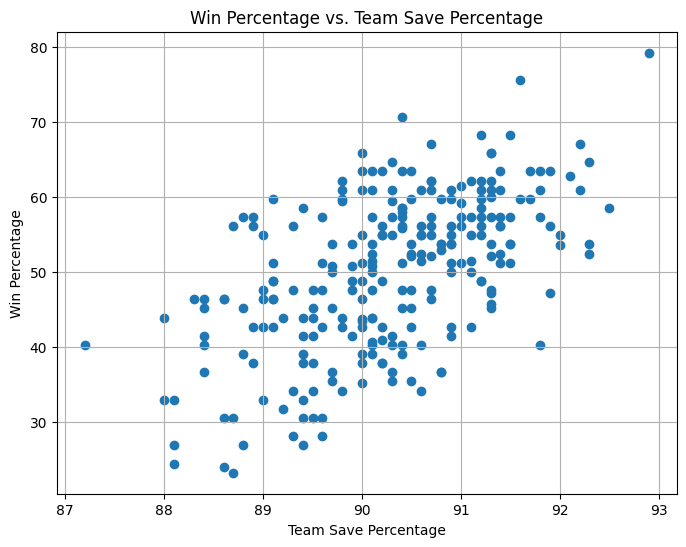

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Save['Team Sv%'], Save['WP'])
plt.title('Win Percentage vs. Team Save Percentage')
plt.xlabel('Team Save Percentage')
plt.ylabel('Win Percentage')
plt.grid(True)
plt.show()

In [74]:
import pandas as pd

# Example: your dataframe is called df and has columns 'WP' and 'SavePct'
Save['WP'].corr(Save['Team Sv%'])

np.float64(0.5715136018764952)



> Add blockquote


#### Plot of Win Percentage versus Team Saves % with Regression Line



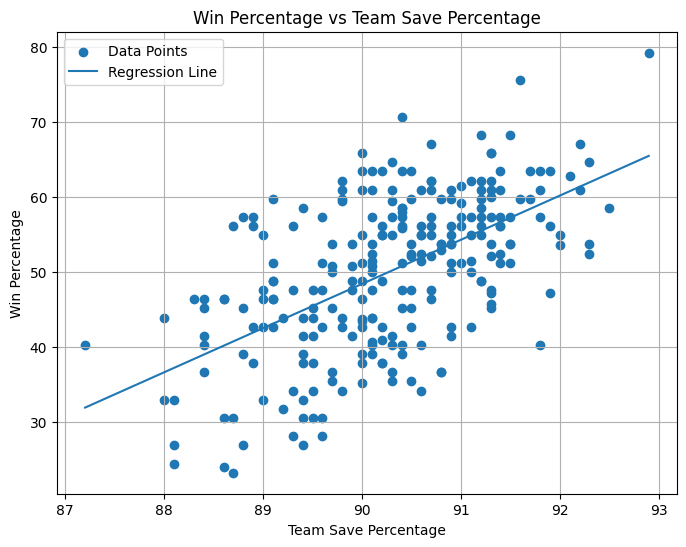

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     120.8
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           3.64e-23
Time:                        17:46:02   Log-Likelihood:                -892.79
No. Observations:                 251   AIC:                             1790.
Df Residuals:                     249   BIC:                             1797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -482.4193     48.449     -9.957

In [66]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# --- Fit Linear Model using Patsy formula ---
# Note: Q("Team Sv%") because the column name has a space and a %
model = smf.ols(formula='WP ~ Q("Team Sv%")', data=Save).fit()

# --- Create Regression Line Data ---
x_vals = np.linspace(Save['Team Sv%'].min(), Save['Team Sv%'].max(), 100)

# Build a DataFrame for prediction with the same column name
pred_df = {'Team Sv%': x_vals}
y_pred = model.predict(pred_df)

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(Save['Team Sv%'], Save['WP'], label='Data Points')
plt.plot(x_vals, y_pred, label='Regression Line')
plt.xlabel('Team Save Percentage')
plt.ylabel('Win Percentage')
plt.title('Win Percentage vs Team Save Percentage')
plt.grid(True)
plt.legend()
plt.show()

# --- (Optional) Display Model Summary ---
print(model.summary())


## Use the Code Below to fit various predictive models and compare on Adjusted R2

In [67]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

interaction_model = smf.ols(
    formula='WP ~ Q("Team Sv%") + SA',
    data=Save
).fit()

print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           3.39e-38
Time:                        17:48:21   Log-Likelihood:                -855.10
No. Observations:                 251   AIC:                             1716.
Df Residuals:                     248   BIC:                             1727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -441.1603     42.012    -10.501

#### Fits Competing DT, RF, NN and KNN models and asseses on SSR.

In [70]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Features and target
feature_cols = ['Team Sv%', 'SA', 'ShotsFor', 'BkS', 'TkA']
X = Save[feature_cols]
y = Save['WP']

models = {
    "Linear Regression": LinearRegression(),

    # Limit depth / leaf size to reduce overfitting
    "Decision Tree": DecisionTreeRegressor(
        max_depth=4,
        min_samples_leaf=5,
        random_state=0
    ),

    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=6,
        min_samples_leaf=5,
        random_state=0
    ),

    # Standardize for distance-based model
    "kNN": make_pipeline(
        StandardScaler(),
        KNeighborsRegressor(n_neighbors=5)
    ),

    # Standardize for NN as well
    "Neural Network": make_pipeline(
        StandardScaler(),
        MLPRegressor(hidden_layer_sizes=(32, 16),
                     activation='relu',
                     max_iter=1000,
                     random_state=0)
    )
}

ssr_results = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    ssr = np.sum((y - y_pred) ** 2)
    ssr_results[name] = ssr

# Print SSR for each model
for name, ssr in ssr_results.items():
    print(f"{name} SSR: {ssr:.2f}")


Linear Regression SSR: 9558.49
Decision Tree SSR: 9213.36
Random Forest SSR: 6272.77
kNN SSR: 8611.90
Neural Network SSR: 7826.87


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



#### Confidence Intervals for the mean and Predictioin Intervals for individual teams.


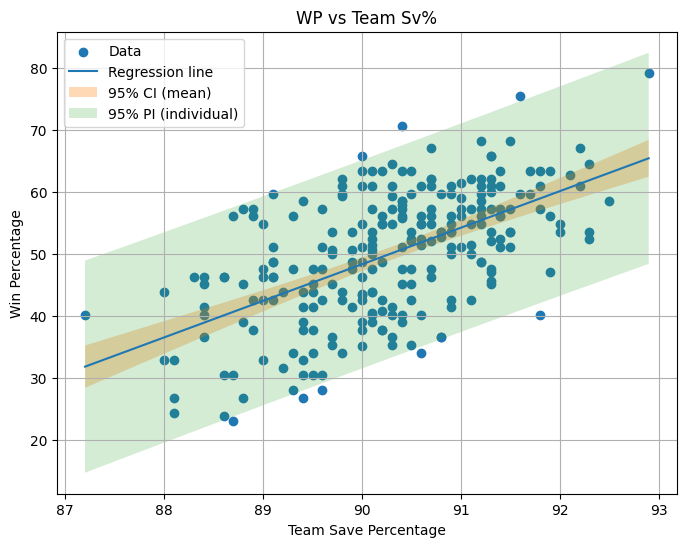

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     120.8
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           3.64e-23
Time:                        13:01:12   Log-Likelihood:                -892.79
No. Observations:                 251   AIC:                             1790.
Df Residuals:                     249   BIC:                             1797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -482.4193     48.449     -9.957

In [5]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# --- Fit linear model WP ~ Team Sv% using Patsy formula ---
# Q("Team Sv%") is used because the column name has a space and a % sign
model = smf.ols(formula='WP ~ Q("Team Sv%")', data=Save).fit()

# --- Create grid of x values for smooth line & intervals ---
x_vals = np.linspace(Save['Team Sv%'].min(), Save['Team Sv%'].max(), 200)

# Build a DataFrame for prediction with the same column name
x_pred = pd.DataFrame({'Team Sv%': x_vals})

# --- Get predictions with intervals ---
pred = model.get_prediction(x_pred)
pred_frame = pred.summary_frame(alpha=0.05)  # 95% intervals

# --- Plot data, regression line, CI, and PI ---
plt.figure(figsize=(8, 6))

# Scatter plot of actual data
plt.scatter(Save['Team Sv%'], Save['WP'], label='Data')

# Regression line (mean prediction)
plt.plot(x_vals, pred_frame['mean'], label='Regression line')

# 95% confidence interval for the mean
plt.fill_between(
    x_vals,
    pred_frame['mean_ci_lower'],
    pred_frame['mean_ci_upper'],
    alpha=0.3,
    label='95% CI (mean)'
)

# 95% prediction interval for individual observations
plt.fill_between(
    x_vals,
    pred_frame['obs_ci_lower'],
    pred_frame['obs_ci_upper'],
    alpha=0.2,
    label='95% PI (individual)'
)

plt.xlabel('Team Save Percentage')
plt.ylabel('Win Percentage')
plt.title('WP vs Team Sv%')
plt.grid(True)
plt.legend()
plt.show()

# Optional: see model details
print(model.summary())


#### CI and PI continued


In [6]:
import statsmodels.formula.api as smf
import pandas as pd

# --- Fit the linear model using Patsy formula ---
# Q("Team Sv%") is required because the column name contains a space and %
model = smf.ols(formula='WP ~ Q("Team Sv%")', data=Save).fit()

# --- New data point: Team Sv% = 90 ---
x_new = pd.DataFrame({'Team Sv%': [90]})

# --- Get prediction with CI & PI ---
pred = model.get_prediction(x_new)
sf = pred.summary_frame(alpha=0.05)  # 95% intervals

mean_estimate = sf['mean'].iloc[0]
mean_ci_lower = sf['mean_ci_lower'].iloc[0]
mean_ci_upper = sf['mean_ci_upper'].iloc[0]

pred_ci_lower = sf['obs_ci_lower'].iloc[0]
pred_ci_upper = sf['obs_ci_upper'].iloc[0]

print(f"Estimated mean WP at Team Sv% = 90: {mean_estimate:.2f}")
print(f"95% CI for mean WP: ({mean_ci_lower:.2f}, {mean_ci_upper:.2f})")
print(f"95% prediction interval for an individual team: ({pred_ci_lower:.2f}, {pred_ci_upper:.2f})")


Estimated mean WP at Team Sv% = 90: 48.38
95% CI for mean WP: (47.28, 49.48)
95% prediction interval for an individual team: (31.57, 65.19)


### Interpretation
#### Simple Linear Regression / SLR

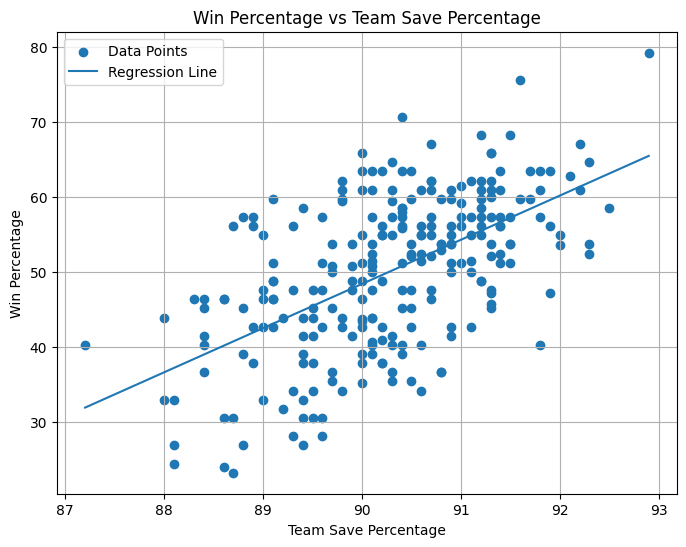

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     120.8
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           3.64e-23
Time:                        18:01:02   Log-Likelihood:                -892.79
No. Observations:                 251   AIC:                             1790.
Df Residuals:                     249   BIC:                             1797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -482.4193     48.449     -9.957

In [69]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# --- Fit Linear Model using Patsy formula ---
# Note: Q("Team Sv%") because the column name has a space and a %
model = smf.ols(formula='WP ~ Q("Team Sv%")', data=Save).fit()

# --- Create Regression Line Data ---
x_vals = np.linspace(Save['Team Sv%'].min(), Save['Team Sv%'].max(), 100)

# Build a DataFrame for prediction with the same column name
pred_df = {'Team Sv%': x_vals}
y_pred = model.predict(pred_df)

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(Save['Team Sv%'], Save['WP'], label='Data Points')
plt.plot(x_vals, y_pred, label='Regression Line')
plt.xlabel('Team Save Percentage')
plt.ylabel('Win Percentage')
plt.title('Win Percentage vs Team Save Percentage')
plt.grid(True)
plt.legend()
plt.show()

# --- (Optional) Display Model Summary ---
print(model.summary())

#### MLR: WP~TeamSave + ShotAgainst

In [7]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

interaction_model = smf.ols(
    formula='WP ~ Q("Team Sv%") + SA',
    data=Save
).fit()

print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           3.39e-38
Time:                        13:01:13   Log-Likelihood:                -855.10
No. Observations:                 251   AIC:                             1716.
Df Residuals:                     248   BIC:                             1727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -441.1603     42.012    -10.501

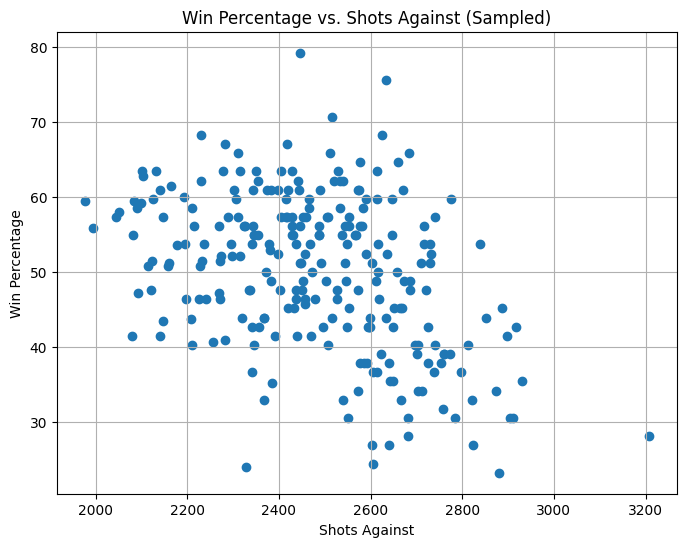

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(Save['SA'], Save['WP'])
plt.title('Win Percentage vs. Shots Against (Sampled)')
plt.xlabel('Shots Against')
plt.ylabel('Win Percentage')
plt.grid(True)
plt.show()

#### Interpret MLR / Controlling for Variables / Holding Variables Fixed

In [58]:
import plotly.express as px
import numpy as np

# Round Team Sv% to nearest whole number
Save['Team Sv Rounded'] = np.round(Save['Team Sv%']).astype(int)

fig = px.scatter(
    Save,
    x='SA',
    y='WP',
    text='Team Sv Rounded',
    title='Win Percentage vs Shots Against versus Team Save %'
)

# Larger figure + font
fig.update_layout(
    width=1200,
    height=900,
    font=dict(size=16),
    xaxis_title="Shots Against",
    yaxis_title="Win Percentage"
)

# Remove scatter dots, keep text only
fig.update_traces(
    marker_opacity=0,
    textposition='middle center',
    textfont=dict(size=14)
)

fig.show()




In [21]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Rounded label
Save['Team Sv Rounded'] = np.round(Save['Team Sv%']).astype(int)

# Build a colormap (red → yellow → green)
norm = mcolors.Normalize(vmin=Save['Team Sv%'].min(), vmax=Save['Team Sv%'].max())
cmap = cm.get_cmap('RdYlGn')

# Convert each Team Sv% value to a color hex string
colors = [mcolors.to_hex(cmap(norm(v))) for v in Save['Team Sv%']]

fig = go.Figure()

# Add text only
fig.add_trace(go.Scatter(
    x=Save['SA'],
    y=Save['WP'],
    mode='text',
    text=Save['Team Sv Rounded'],
    textfont=dict(color=colors, size=14),
    hovertemplate='SA: %{x}<br>WP: %{y}<br>Team Sv: %{text}%<extra></extra>'
))

# Axis labels + size
fig.update_layout(
    width=1200,
    height=900,
    title='WP vs Shots Against (numbers colored by Team Save %)',
    xaxis_title='Shots Against',
    yaxis_title='Win Percentage',
)

fig.show()



/tmp/ipython-input-1664796507.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     89.99
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           2.21e-39
Time:                        16:28:04   Log-Likelihood:                -849.73
No. Observations:                 251   AIC:                             1707.
Df Residuals:                     247   BIC:                             1722.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1283.6860    526.329  

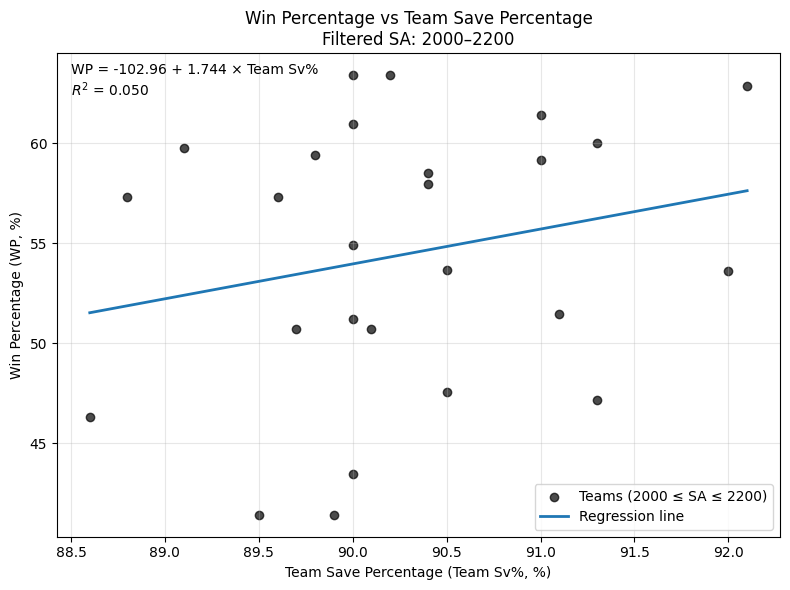

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.257
Date:                Thu, 04 Dec 2025   Prob (F-statistic):              0.273
Time:                        14:26:43   Log-Likelihood:                -85.477
No. Observations:                  26   AIC:                             175.0
Df Residuals:                      24   BIC:                             177.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -102.9609    140.409     -0.733

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Filter teams by SA range
sub = Save[(Save['SA'] >= 2000) & (Save['SA'] <= 2200)].copy()

# 2. Fit linear model: WP ~ Team Sv%
model = smf.ols('WP ~ Q("Team Sv%")', data=sub).fit()

# 3. Create smooth x grid and predicted values for regression line
x_vals = np.linspace(sub['Team Sv%'].min(), sub['Team Sv%'].max(), 200)
pred_df = pd.DataFrame({'Team Sv%': x_vals})
y_hat = model.predict(pred_df)

# 4. Pull coefficients and R² for annotation
b0 = model.params['Intercept']
b1 = model.params['Q("Team Sv%")']
r2 = model.rsquared

eq_text = f'WP = {b0:.2f} + {b1:.3f} × Team Sv%'
r2_text = f'$R^2$ = {r2:.3f}'

# 5. Plot scatter + regression line
plt.figure(figsize=(8, 6))
plt.scatter(sub['Team Sv%'], sub['WP'], color='black', alpha=0.7,
            label='Teams (2000 ≤ SA ≤ 2200)')
plt.plot(x_vals, y_hat, color='tab:blue', linewidth=2, label='Regression line')

plt.xlabel('Team Save Percentage (Team Sv%, %)')
plt.ylabel('Win Percentage (WP, %)')
plt.title('Win Percentage vs Team Save Percentage\nFiltered SA: 2000–2200')

# Put the equation and R² in the upper left of the plot
plt.text(0.02, 0.98, eq_text + '\n' + r2_text,
         transform=plt.gca().transAxes,
         va='top', ha='left')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# (Optional) full regression output
print(model.summary())


## Slope of WP versus Team Save % dependent of Shot Against
Shot Against: (2400, 2600)

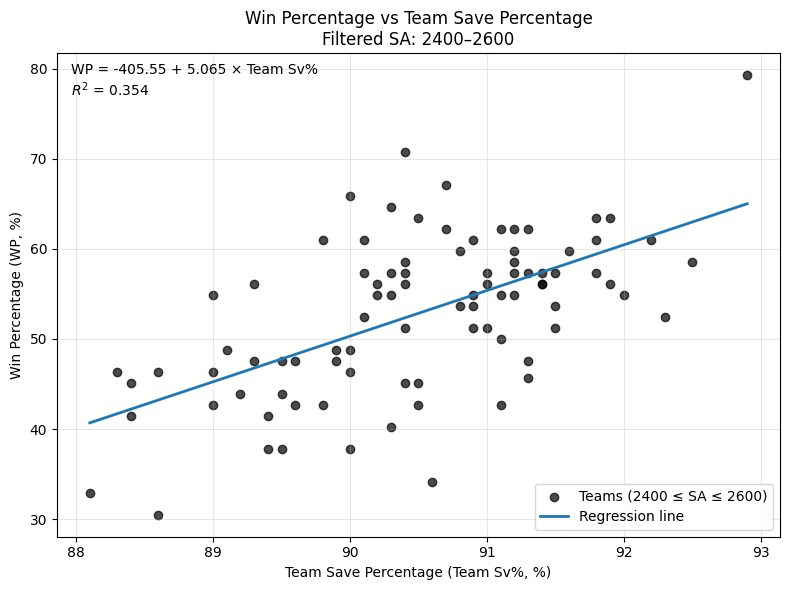

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     47.15
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           9.72e-10
Time:                        14:32:03   Log-Likelihood:                -296.24
No. Observations:                  88   AIC:                             596.5
Df Residuals:                      86   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -405.5472     66.756     -6.075

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Filter teams by SA range
sub = Save[(Save['SA'] >= 2400) & (Save['SA'] <= 2600)].copy()

# 2. Fit linear model: WP ~ Team Sv%
model = smf.ols('WP ~ Q("Team Sv%")', data=sub).fit()

# 3. Create smooth x grid and predicted values for regression line
x_vals = np.linspace(sub['Team Sv%'].min(), sub['Team Sv%'].max(), 200)
pred_df = pd.DataFrame({'Team Sv%': x_vals})
y_hat = model.predict(pred_df)

# 4. Pull coefficients and R² for annotation
b0 = model.params['Intercept']
b1 = model.params['Q("Team Sv%")']
r2 = model.rsquared

eq_text = f'WP = {b0:.2f} + {b1:.3f} × Team Sv%'
r2_text = f'$R^2$ = {r2:.3f}'

# 5. Plot scatter + regression line
plt.figure(figsize=(8, 6))
plt.scatter(sub['Team Sv%'], sub['WP'], color='black', alpha=0.7,
            label='Teams (2400 ≤ SA ≤ 2600)')
plt.plot(x_vals, y_hat, color='tab:blue', linewidth=2, label='Regression line')

plt.xlabel('Team Save Percentage (Team Sv%, %)')
plt.ylabel('Win Percentage (WP, %)')
plt.title('Win Percentage vs Team Save Percentage\nFiltered SA: 2400–2600')

# Equation + R² in top-left corner
plt.text(0.02, 0.98, eq_text + '\n' + r2_text,
         transform=plt.gca().transAxes,
         va='top', ha='left')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: full statsmodels summary
print(model.summary())


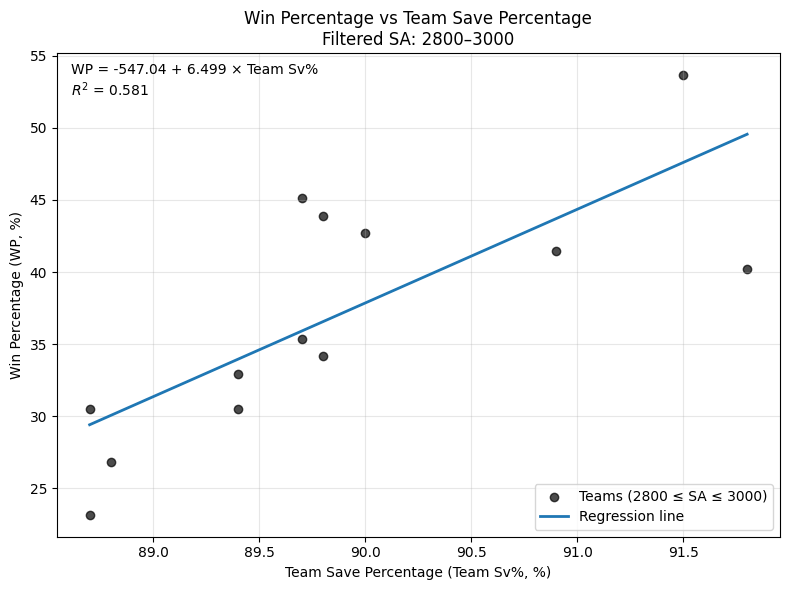

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     15.28
Date:                Thu, 04 Dec 2025   Prob (F-statistic):            0.00244
Time:                        14:41:42   Log-Likelihood:                -40.038
No. Observations:                  13   AIC:                             84.08
Df Residuals:                      11   BIC:                             85.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -547.0400    149.388     -3.662

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Filter teams by SA range
sub = Save[(Save['SA'] >= 2800) & (Save['SA'] <= 3000)].copy()

# 2. Fit linear model: WP ~ Team Sv%
model = smf.ols('WP ~ Q("Team Sv%")', data=sub).fit()

# 3. Create smooth x grid and predicted values for regression line
x_vals = np.linspace(sub['Team Sv%'].min(), sub['Team Sv%'].max(), 200)
pred_df = pd.DataFrame({'Team Sv%': x_vals})
y_hat = model.predict(pred_df)

# 4. Pull coefficients and R² for annotation
b0 = model.params['Intercept']
b1 = model.params['Q("Team Sv%")']
r2 = model.rsquared

eq_text = f'WP = {b0:.2f} + {b1:.3f} × Team Sv%'
r2_text = f'$R^2$ = {r2:.3f}'

# 5. Plot scatter + regression line
plt.figure(figsize=(8, 6))
plt.scatter(sub['Team Sv%'], sub['WP'], color='black', alpha=0.7,
            label='Teams (2800 ≤ SA ≤ 3000)')
plt.plot(x_vals, y_hat, color='tab:blue', linewidth=2, label='Regression line')

plt.xlabel('Team Save Percentage (Team Sv%, %)')
plt.ylabel('Win Percentage (WP, %)')
plt.title('Win Percentage vs Team Save Percentage\nFiltered SA: 2800–3000')

# Equation + R² in top-left corner
plt.text(0.02, 0.98, eq_text + '\n' + r2_text,
         transform=plt.gca().transAxes,
         va='top', ha='left')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: full statsmodels summary
print(model.summary())


In [71]:
import statsmodels.formula.api as smf

interaction_model = smf.ols(
    formula='WP ~ Q("Team Sv%") * SA ',
    data=Save
).fit()

print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     89.99
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           2.21e-39
Time:                        18:03:23   Log-Likelihood:                -849.73
No. Observations:                 251   AIC:                             1707.
Df Residuals:                     247   BIC:                             1722.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1283.6860    526.329  